<a href="https://colab.research.google.com/github/hsuemily/CE888_Hsu-Chi-Rou_1900759/blob/master/ANN%20and%20CNN%20Models/ANN_time_series_forecasting_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [3]:
## import library
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import metrics
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import SGD
import time

# Read dataset

In [14]:
## Read dataset
Data = pd.read_csv('data_plot02.csv',',')
Data.head()

,X,Y,Z
0,0.019,0.02,0.024
1,0.019,0.02,0.024
2,0.019,0.02,0.024
3,0.019,0.02,0.024
4,0.019,0.02,0.024


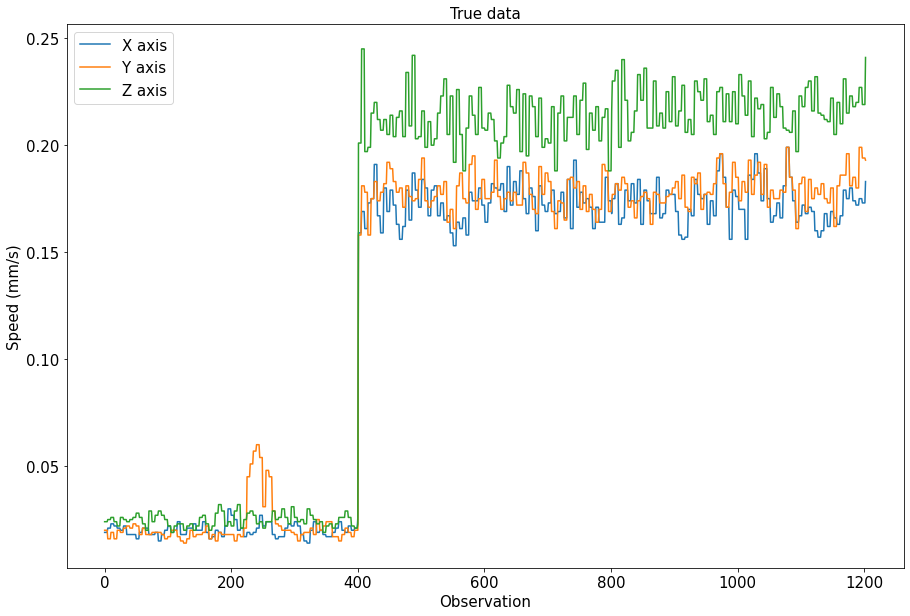

In [15]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.plot(Data['X'],label='X axis')
plt.plot(Data['Y'],label='Y axis')
plt.plot(Data['Z'],label='Z axis')
plt.title("True data",fontsize=15)
plt.xlabel('Observation',fontsize=15)
plt.ylabel('Speed (mm/s)',fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [4]:
# Case A (input data = 6 hours)
X_train = pd.read_csv('X_train_6_02.csv',',')
y_train = pd.read_csv('y_train_6_02.csv',',')
X_vali = pd.read_csv('X_vali_6_02.csv',',')
y_vali = pd.read_csv('y_vali_6_02.csv',',')
X_test = pd.read_csv('X_test_6_02.csv',',')
y_test = pd.read_csv('y_test_6_02.csv',',')

# Case B (input data = 12 hours)
# X_train = pd.read_csv('X_train_12_02.csv',',')
# y_train = pd.read_csv('y_train_12_02.csv',',')
# X_vali = pd.read_csv('X_vali_12_02.csv',',')
# y_vali = pd.read_csv('y_vali_12_02.csv',',')
# X_test = pd.read_csv('X_test_12_02.csv',',')
# y_test = pd.read_csv('y_test_12_02.csv',',')

# Case C (input data = 24 hours)
# X_train = pd.read_csv('X_train_24_02.csv',',')
# y_train = pd.read_csv('y_train_24_02.csv',',')
# X_vali = pd.read_csv('X_vali_24_02.csv',',')
# y_vali = pd.read_csv('y_vali_24_02.csv',',')
# X_test = pd.read_csv('X_test_24_02.csv',',')
# y_test = pd.read_csv('y_test_24_02.csv',',')

# Case D (input data = 48 hours)
# X_train = pd.read_csv('X_train_48_02.csv',',')
# y_train = pd.read_csv('y_train_48_02.csv',',')
# X_vali = pd.read_csv('X_vali_48_02.csv',',')
# y_vali = pd.read_csv('y_vali_48_02.csv',',')
# X_test = pd.read_csv('X_test_48_02.csv',',')
# y_test = pd.read_csv('y_test_48_02.csv',',')

# Build Model

In [ ]:
## Bilud model
nn_model = Sequential()
nn_model.add(Dense(4, input_dim=144, activation='sigmoid'))
nn_model.add(Dense(4, activation='sigmoid'))
# nn_model.add(Dense(9, activation='sigmoid'))
nn_model.add(Dense(18))
print(nn_model.summary())

In [ ]:
# Training and testing model
start = time.time()
path_model='48hr_4x4_model_filter_lr0.01_mo0.1_SGD_500.h5' # save model at this location after each epoch
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.1)
nn_model.compile(loss='mean_squared_error', optimizer=optimizer)
history = nn_model.fit(X_train, y_train, 
                       epochs=500, 
                       batch_size=1, 
                       verbose=1,
                       validation_data=(X_vali,y_vali), 
                       callbacks=[ModelCheckpoint(filepath=path_model)], shuffle=False)  #early_stop
end = time.time()
running_time = end-start
print('time cost : %.5f sec' %running_time)

# Visulize the Result

In [ ]:
## Visulize the Result
y_pred_train_nn = nn_model.predict(X_train)
y_pred_vali_nn = nn_model.predict(X_vali)
y_pred_test_nn = nn_model.predict(X_test)
score_train = np.sqrt(metrics.mean_squared_error(y_pred_train_nn,y_train))
score_vali = np.sqrt(metrics.mean_squared_error(y_pred_vali_nn,y_vali))
score_test = np.sqrt(metrics.mean_squared_error(y_pred_test_nn,y_test))
print("RMSE Score on Training data: {}".format(score_train))
print("RMSE Score on Validating data: {}".format(score_vali))
print("RMSE Score on Testing data: {}".format(score_test))

In [ ]:
plt.figure(figsize=(15, 10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
loss = np.sqrt(history.history.get('loss'))
val_loss = np.sqrt(history.history.get('val_loss'))
plt.plot(range(len(loss)), loss, label='Training RMSE')
plt.plot(range(len(val_loss)), val_loss, label='Validation RMSE')
plt.legend(loc='upper right',fontsize=15)
plt.title('Root Mean Square Error',fontsize=15)
plt.xlabel('The number of epoch',fontsize=15)
plt.ylabel('Root Mean Square Error',fontsize=15)

In [ ]:
# save the result to csv file
loss_df = pd.DataFrame(loss)
val_loss_df = pd.DataFrame(val_loss)
loss_df.to_csv('48hr_4x4_train_RMSE_lr0.01_mo0.1_SGD_500.csv', index = False) 
val_loss_df.to_csv('48hr_4x4_validate_RMSE_lr0.01_mo0.1_SGD_500.csv', index = False)

In [ ]:
# The true and predictive value in validating data (X axis)
plt.figure(figsize=(10, 6))
plt.plot(y_vali.values[:,5],'red',label='True(X axis)')
plt.plot(y_pred_vali_nn[:,5],linestyle='--',label='NN(X axis)')
plt.title("The true and predictive value in validating data ")
plt.xlabel('Observation')
plt.ylabel('Amplitudes')
plt.legend()
plt.show()

In [ ]:
# The true and predictive value in validating data (Y axis)
plt.figure(figsize=(10, 6))
plt.plot(y_vali.values[:,11],'darkorange',label='True(Y axis)')
plt.plot(y_pred_vali_nn[:,11],'fuchsia',linestyle='--',label='NN(Y axis)')
plt.title("The true and predictive value in validating data")
plt.xlabel('Observation')
plt.ylabel('Amplitudes')
plt.legend()
plt.show()

In [ ]:
# The true and predictive value in validating data (Z axis)
plt.figure(figsize=(10, 6))
plt.plot(y_vali.values[:,17],'darkgreen',label='True(Z axis)')
plt.plot(y_pred_vali_nn[:,17],'brown',linestyle='--',label='NN(Z axis)')
plt.title("The true and predictive value in validating data")
plt.xlabel('Observation')
plt.ylabel('Amplitudes')
plt.legend()
plt.show()

In [ ]:
# The true and predictive value in testing data (X axis)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:,5],'red',label='True(X axis)')
plt.plot(y_pred_test_nn[:,5],linestyle='--',label='NN(X axis)')
plt.title("The true and predictive value in testing data ")
plt.xlabel('Observation')
plt.ylabel('Amplitudes')
plt.legend()
plt.show()

In [ ]:
# The true and predictive value in testing data (Y axis)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:,11],'darkorange',label='True(Y axis)')
plt.plot(y_pred_test_nn[:,11],'fuchsia',linestyle='--',label='NN(Y axis)')
plt.title("The true and predictive value in testing data")
plt.xlabel('Observation')
plt.ylabel('Amplitudes')
plt.legend()
plt.show()

In [ ]:
# The true and predictive value in testing data (Z axis)
plt.figure(figsize=(10, 6))
plt.plot(y_test.values[:,17],'darkgreen',label='True(Z axis)')
plt.plot(y_pred_test_nn[:,17],'brown',linestyle='--',label='NN(Z axis)')
plt.title("The true and predictive value in testing data")
plt.xlabel('Observation')
plt.ylabel('Amplitudes')
plt.legend()
plt.show()

# Load the learning Model

In [1]:
## Load the learning Model
# Ref: https://machinelearningmastery.com/save-load-keras-deep-learning-models/
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 
# load model
nn_model = load_model('6hr_4x4_model_filter_lr0.01_mo0.1_SGD_500.h5')
# summarize model.
nn_model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 4)                 76        
_________________________________________________________________
dense_48 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_49 (Dense)             (None, 18)                90        
Total params: 186
Trainable params: 186
Non-trainable params: 0
_________________________________________________________________


In [4]:
## Load dataset
X_train = pd.read_csv('X_train_6_02.csv',',',names=['X1','X2','X3','X4','X5','X6','Y1','Y2','Y3','Y4','Y5','Y6','Z1','Z2','Z3','Z4','Z5','Z6'])
y_train = pd.read_csv('y_train_6_02.csv',',',names=['X1','X2','X3','X4','X5','X6','Y1','Y2','Y3','Y4','Y5','Y6','Z1','Z2','Z3','Z4','Z5','Z6'])
X_vali = pd.read_csv('X_vali_6_02.csv',',',names=['X1','X2','X3','X4','X5','X6','Y1','Y2','Y3','Y4','Y5','Y6','Z1','Z2','Z3','Z4','Z5','Z6'])
y_vali = pd.read_csv('y_vali_6_02.csv',',',names=['X1','X2','X3','X4','X5','X6','Y1','Y2','Y3','Y4','Y5','Y6','Z1','Z2','Z3','Z4','Z5','Z6'])
X_test = pd.read_csv('X_test_6_02.csv',',',names=['X1','X2','X3','X4','X5','X6','Y1','Y2','Y3','Y4','Y5','Y6','Z1','Z2','Z3','Z4','Z5','Z6'])
y_test = pd.read_csv('y_test_6_02.csv',',',names=['X1','X2','X3','X4','X5','X6','Y1','Y2','Y3','Y4','Y5','Y6','Z1','Z2','Z3','Z4','Z5','Z6'])

In [5]:
## estimate the accuracy
y_pred_train_nn = nn_model.predict(X_train)
y_pred_vali_nn = nn_model.predict(X_vali)
y_pred_test_nn = nn_model.predict(X_test)
score_train = np.sqrt(metrics.mean_squared_error(y_pred_train_nn,y_train))
score_vali = np.sqrt(metrics.mean_squared_error(y_pred_vali_nn,y_vali))
score_test = np.sqrt(metrics.mean_squared_error(y_pred_test_nn,y_test))
print("RMSE Score on Training data: {}".format(score_train))
print("RMSE Score on Validating data: {}".format(score_vali))
print("RMSE Score on Testing data: {}".format(score_test))

RMSE Score on Training data: 0.015550600398323537
RMSE Score on Validating data: 0.011151600713571208
RMSE Score on Testing data: 0.00961950858788645


In [6]:
## Visulize the result
# Combining true and predictive datasets
y_train_np= y_train.to_numpy()
y_vali_np= y_vali.to_numpy()
y_test_np= y_test.to_numpy()
true = np.vstack((y_train_np,y_vali_np,y_test_np))
df_true = pd.DataFrame(true)
pred = np.vstack((y_pred_train_nn,y_pred_vali_nn,y_pred_test_nn))
df_pred = pd.DataFrame(pred)

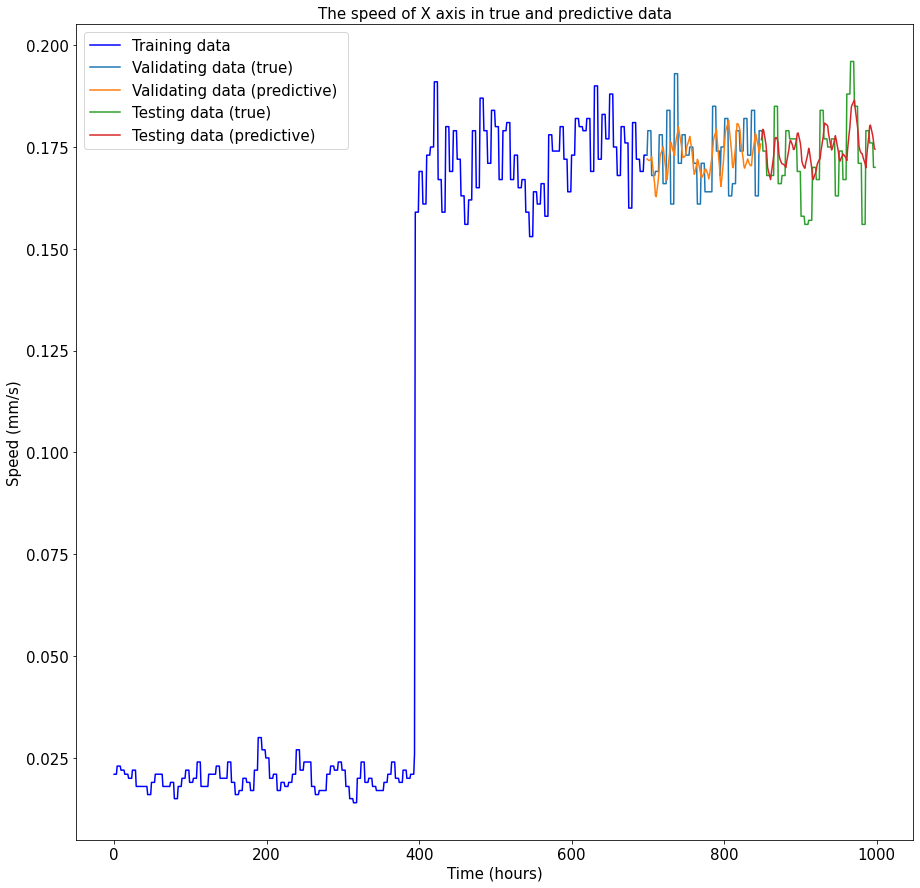

In [7]:
# The result in X axis
train = df_true.iloc[0:699,0]
vali_true = df_true.iloc[699:849,0]
vali_pred = df_pred.iloc[699:849,0]
test_true = df_true.iloc[849:999,0]
test_pred = df_pred.iloc[849:999,0]
plt.figure(figsize=(15, 15))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('The speed of X axis in true and predictive data',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('Speed (mm/s)',fontsize=15)
plt.plot(train, 'blue',label='Training data')
plt.plot(vali_true, label='Validating data (true)')
plt.plot(vali_pred ,label='Validating data (predictive) ')
plt.plot(test_true, label='Testing data (true)')
plt.plot(test_pred ,label='Testing data (predictive) ')
plt.legend(fontsize=15)
plt.show()

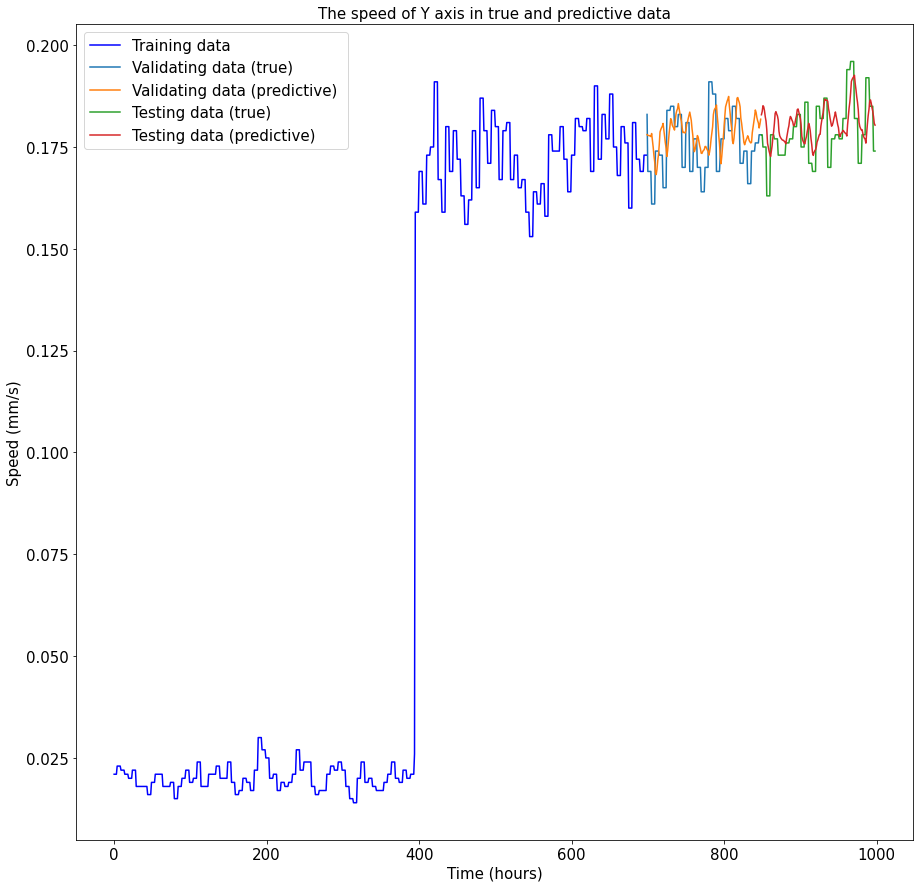

In [8]:
# The result in Y axis
train = df_true.iloc[0:699,0]
vali_true = df_true.iloc[699:849,6]
vali_pred = df_pred.iloc[699:849,6]
test_true = df_true.iloc[849:999,6]
test_pred = df_pred.iloc[849:999,6]
plt.figure(figsize=(15, 15))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('The speed of Y axis in true and predictive data',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('Speed (mm/s)',fontsize=15)
plt.plot(train, 'blue',label='Training data')
plt.plot(vali_true, label='Validating data (true)')
plt.plot(vali_pred ,label='Validating data (predictive) ')
plt.plot(test_true, label='Testing data (true)')
plt.plot(test_pred ,label='Testing data (predictive) ')
plt.legend(fontsize=15)
plt.show()

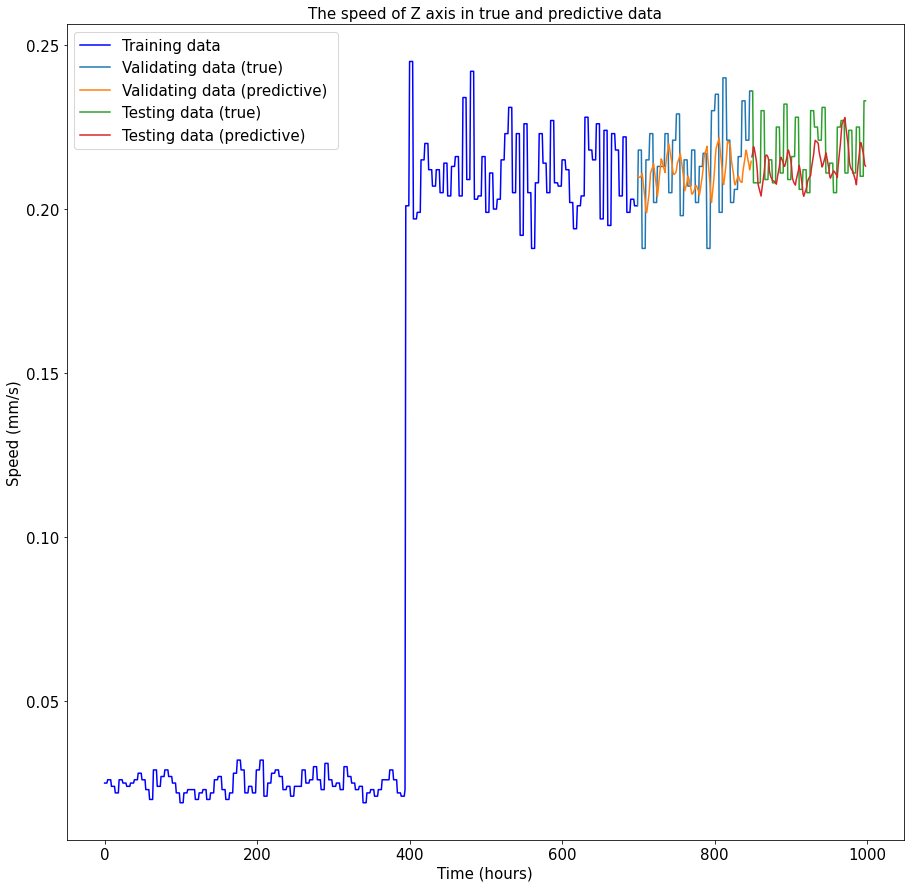

In [9]:
# The result in Z axis
train = df_true.iloc[0:699,12]
vali_true = df_true.iloc[699:849,12]
vali_pred = df_pred.iloc[699:849,12]
test_true = df_true.iloc[849:999,12]
test_pred = df_pred.iloc[849:999,12]
plt.figure(figsize=(15, 15))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('The speed of Z axis in true and predictive data',fontsize=15)
plt.xlabel('Time (hours)',fontsize=15)
plt.ylabel('Speed (mm/s)',fontsize=15)
plt.plot(train, 'blue',label='Training data')
plt.plot(vali_true, label='Validating data (true)')
plt.plot(vali_pred ,label='Validating data (predictive) ')
plt.plot(test_true, label='Testing data (true)')
plt.plot(test_pred ,label='Testing data (predictive) ')
plt.legend(fontsize=15)
plt.show()